Loading Data

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

Exploring Data

In [9]:
#Explore dataset
import pandas as pd

# Combine features and targets into a single DataFrame for easier inspection
df = pd.concat([X, y], axis=1)

print(df.shape)

(699, 10)


In [11]:
print(df.head())

   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


In [15]:
#Print unique values of 'Bare_nuclei'

print(df['Bare_nuclei'].unique())

[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]


Preprocessing Data

In [105]:
# Filter for rows with NaN in 'Bare_nuclei'
nan_rows = df[df['Bare_nuclei'].isnull()]

# Display the filtered rows
print(nan_rows)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
23                 8                        4                         5   
40                 6                        6                         6   
139                1                        1                         1   
145                1                        1                         3   
158                1                        1                         2   
164                5                        1                         1   
235                3                        1                         4   
249                3                        1                         1   
275                3                        1                         3   
292                8                        8                         8   
294                1                        1                         1   
297                5                        4                         3   
315                4     

In [106]:
#Get row count of NaN within 'Bare Nuclei'

nan_count = df['Bare_nuclei'].isnull().sum()
print(nan_count)

16


In [107]:
# Convert 'Bare_nuclei' to numeric, coerce errors to NaN
df['Bare_nuclei'] = pd.to_numeric(df['Bare_nuclei'], errors='coerce')

# Drop rows with NaN in 'Bare_nuclei'
df = df.dropna(subset=['Bare_nuclei'])

# Convert 'Bare_nuclei' to int64
df['Bare_nuclei'] = df['Bare_nuclei'].astype('int64')

In [108]:
#Verify changes

print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              683 non-null    int64
 1   Uniformity_of_cell_size      683 non-null    int64
 2   Uniformity_of_cell_shape     683 non-null    int64
 3   Marginal_adhesion            683 non-null    int64
 4   Single_epithelial_cell_size  683 non-null    int64
 5   Bare_nuclei                  683 non-null    int64
 6   Bland_chromatin              683 non-null    int64
 7   Normal_nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB
None


,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,0
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


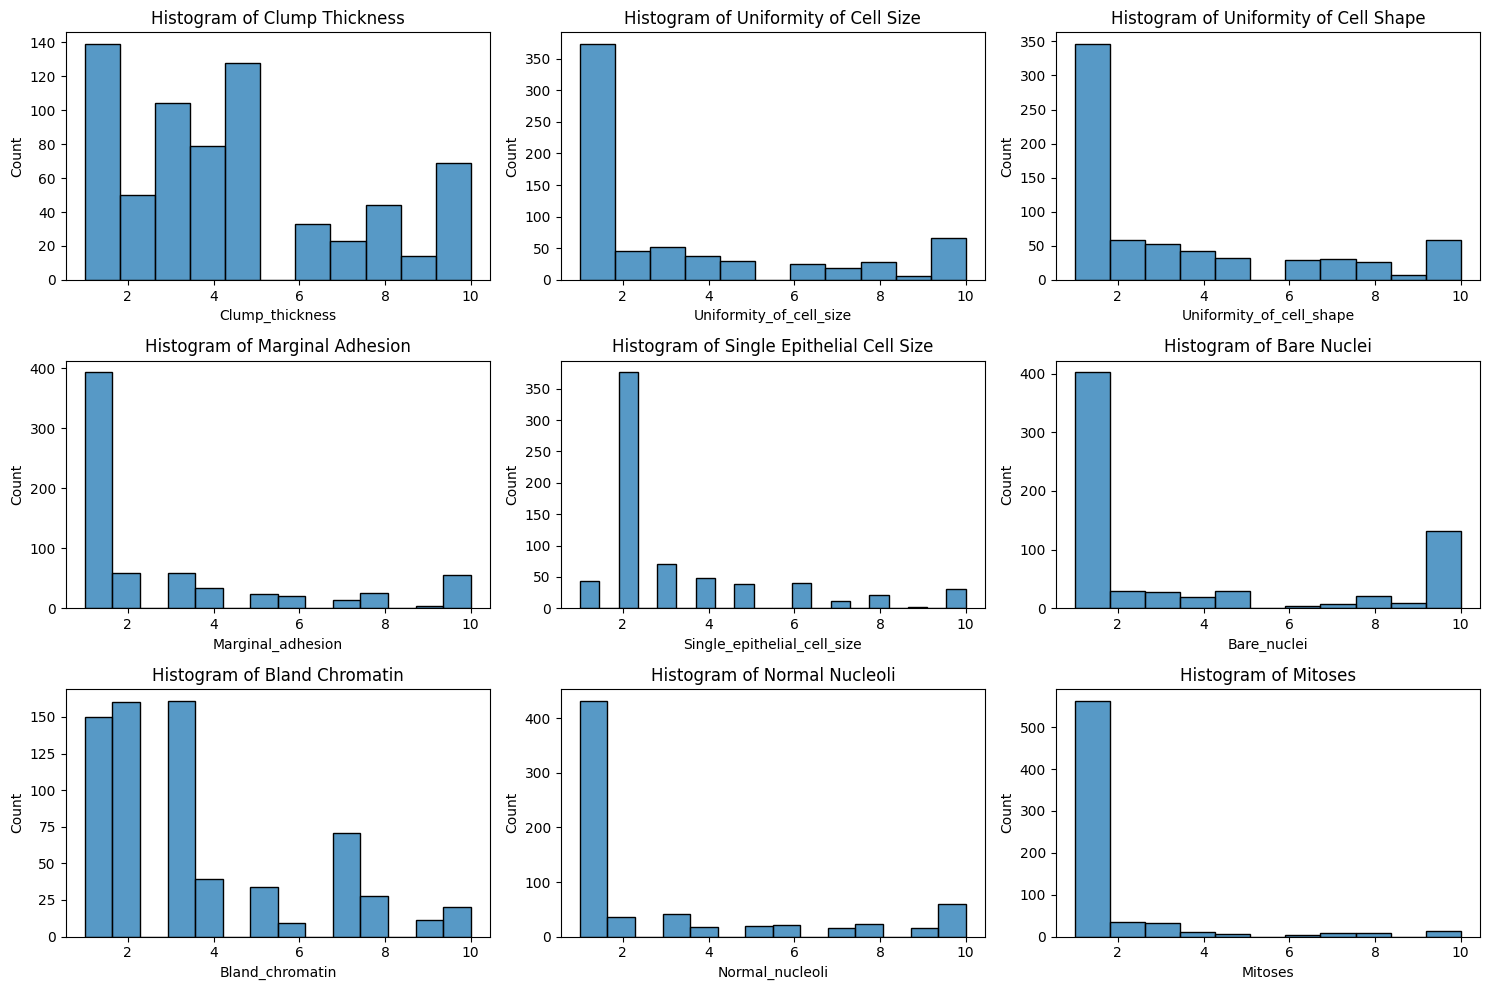

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Clump Thickness
sns.histplot(data=df['Clump_thickness'], ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Clump Thickness')

# Uniformity of Cell Size
sns.histplot(data=df['Uniformity_of_cell_size'], ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Uniformity of Cell Size')

# Uniformity of Cell Shape
sns.histplot(data=df['Uniformity_of_cell_shape'], ax=axes[0, 2])
axes[0, 2].set_title('Histogram of Uniformity of Cell Shape')

# Marginal Adhesion
sns.histplot(data=df['Marginal_adhesion'], ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Marginal Adhesion')

# Single Epithelial Cell Size
sns.histplot(data=df['Single_epithelial_cell_size'], ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Single Epithelial Cell Size')

# Bare Nuclei
sns.histplot(data=df['Bare_nuclei'], ax=axes[1, 2])
axes[1, 2].set_title('Histogram of Bare Nuclei')

# Bland Chromatin
sns.histplot(data=df['Bland_chromatin'], ax=axes[2, 0])
axes[2, 0].set_title('Histogram of Bland Chromatin')

# Normal Nucleoli
sns.histplot(data=df['Normal_nucleoli'], ax=axes[2, 1])
axes[2, 1].set_title('Histogram of Normal Nucleoli')

# Mitoses
sns.histplot(data=df['Mitoses'], ax=axes[2, 2])
axes[2, 2].set_title('Histogram of Mitoses')

# Adjust layout and display
plt.tight_layout()
plt.show()

mostly unimodial distributions with an overall positive skew

In [110]:
# Explore values of Categorical Variables

print("\nValue counts for 'class':")
print(y.value_counts(dropna=False).to_string())


Value counts for 'class':
Class
2        458
4        241


2 = benign, 4 = malignant

In [111]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [112]:
# Include all columns in describe()
print(df.describe(include='all'))

       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       683.000000               683.000000                683.000000   
mean          4.442167                 3.150805                  3.215227   
std           2.820761                 3.065145                  2.988581   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         683.000000                   683.000000   683.000000   
mean            2.830161                     3.234261     3.544656   
std             2.864562                     2.223085     3.643857   
min             1.000000  

Exploring Target Variable

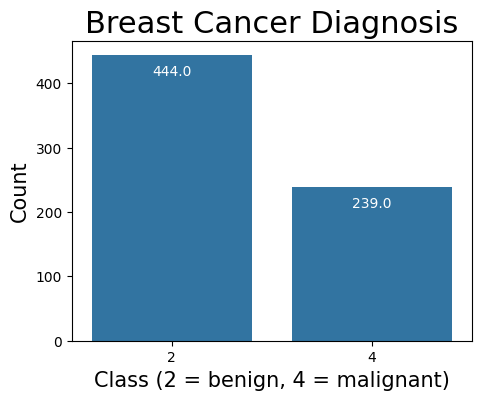

In [113]:
# Visualize the distribution of the target variable 'class'

fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(data=df, x='Class')
plt.title('Breast Cancer Diagnosis', fontsize=22)
ax.set_xlabel("Class (2 = benign, 4 = malignant)", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

# Add count labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, -12),
                textcoords='offset points')

plt.show()

In [114]:
# Investigate Correlation between Variables and Class

correlations = df.corr()['Class'].sort_values(ascending=False)
print(correlations)

Class                          1.000000
Bare_nuclei                    0.822696
Uniformity_of_cell_shape       0.821891
Uniformity_of_cell_size        0.820801
Bland_chromatin                0.758228
Normal_nucleoli                0.718677
Clump_thickness                0.714790
Marginal_adhesion              0.706294
Single_epithelial_cell_size    0.690958
Mitoses                        0.423448
Name: Class, dtype: float64


The features 'Bare_nuclei', 'Uniformity_of_cell_shape', and 'Uniformity_of_cell_size' exhibit the strongest positive correlations with the 'Class' variable, with correlation coefficients around 0.82. This indicates that as the values of these features increase, the likelihood of a malignant diagnosis (Class = 4) also increases.

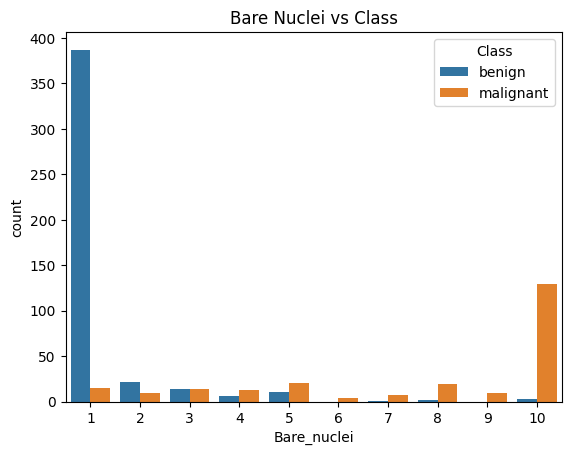

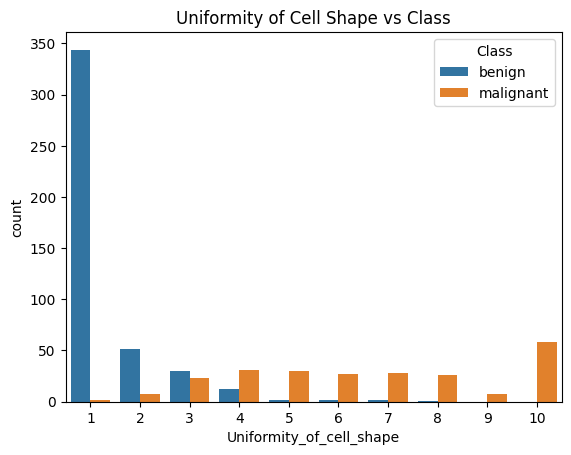

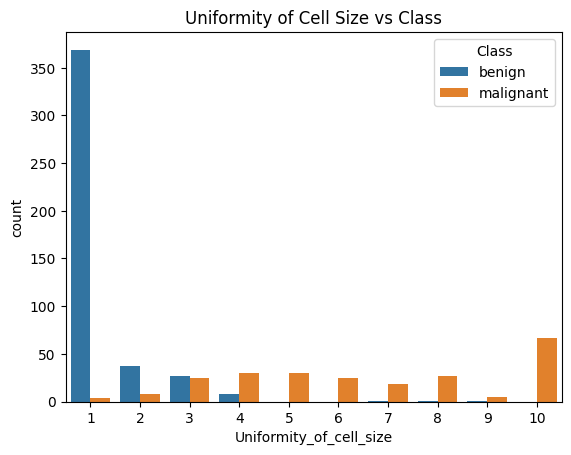

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping class to benign and malignant
df['Class'] = df['Class'].map({2: 'benign', 4: 'malignant'})

# Count plot for 'Bare_nuclei' vs 'Class'
sns.countplot(x='Bare_nuclei', hue='Class', data=df)
plt.title('Bare Nuclei vs Class')
plt.show()

# Count plot for 'Uniformity_of_cell_shape' vs 'Class'
sns.countplot(x='Uniformity_of_cell_shape', hue='Class', data=df)
plt.title('Uniformity of Cell Shape vs Class')
plt.show()

# Count plot for 'Uniformity_of_cell_size' vs 'Class'
sns.countplot(x='Uniformity_of_cell_size', hue='Class', data=df)
plt.title('Uniformity of Cell Size vs Class')
plt.show()